## **BINARY NODE CLASSIFICATION**

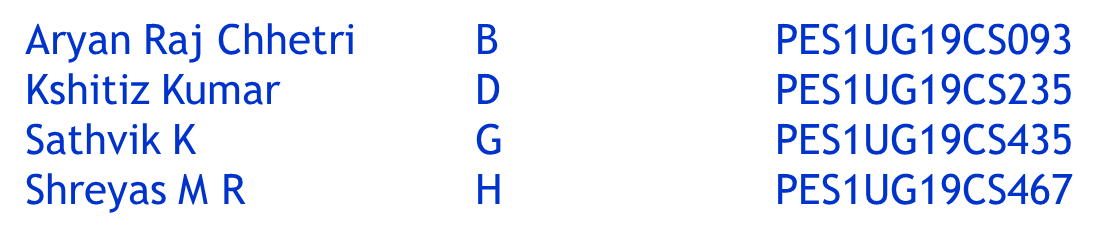

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx

In [4]:
nodes = pd.read_csv('nodes.csv')#node URLs
labels = pd.read_csv('./label.csv')#corresponding labels
feat = pd.read_csv('./feat.csv')#corresponding features
edges = pd.read_csv('./edges.csv')#edges in the form source, destination
src=list(edges['src'])
dst=list(edges[' dst'])
#loading unique labels for mapping them to int ids
labelsm = pd.read_csv('./labels.csv')

# Network Visualisation

In [5]:
edges

,src,dst
0,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
1,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
2,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
3,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
4,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
...,...,...
3167,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
3168,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
3169,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...
3170,http://counterterror.mindswap.org/2005/ict_eve...,http://counterterror.mindswap.org/2005/ict_eve...


In [6]:
G = nx.Graph()
for index,row in edges.iterrows():
  G.add_edge(row[0],row[1])

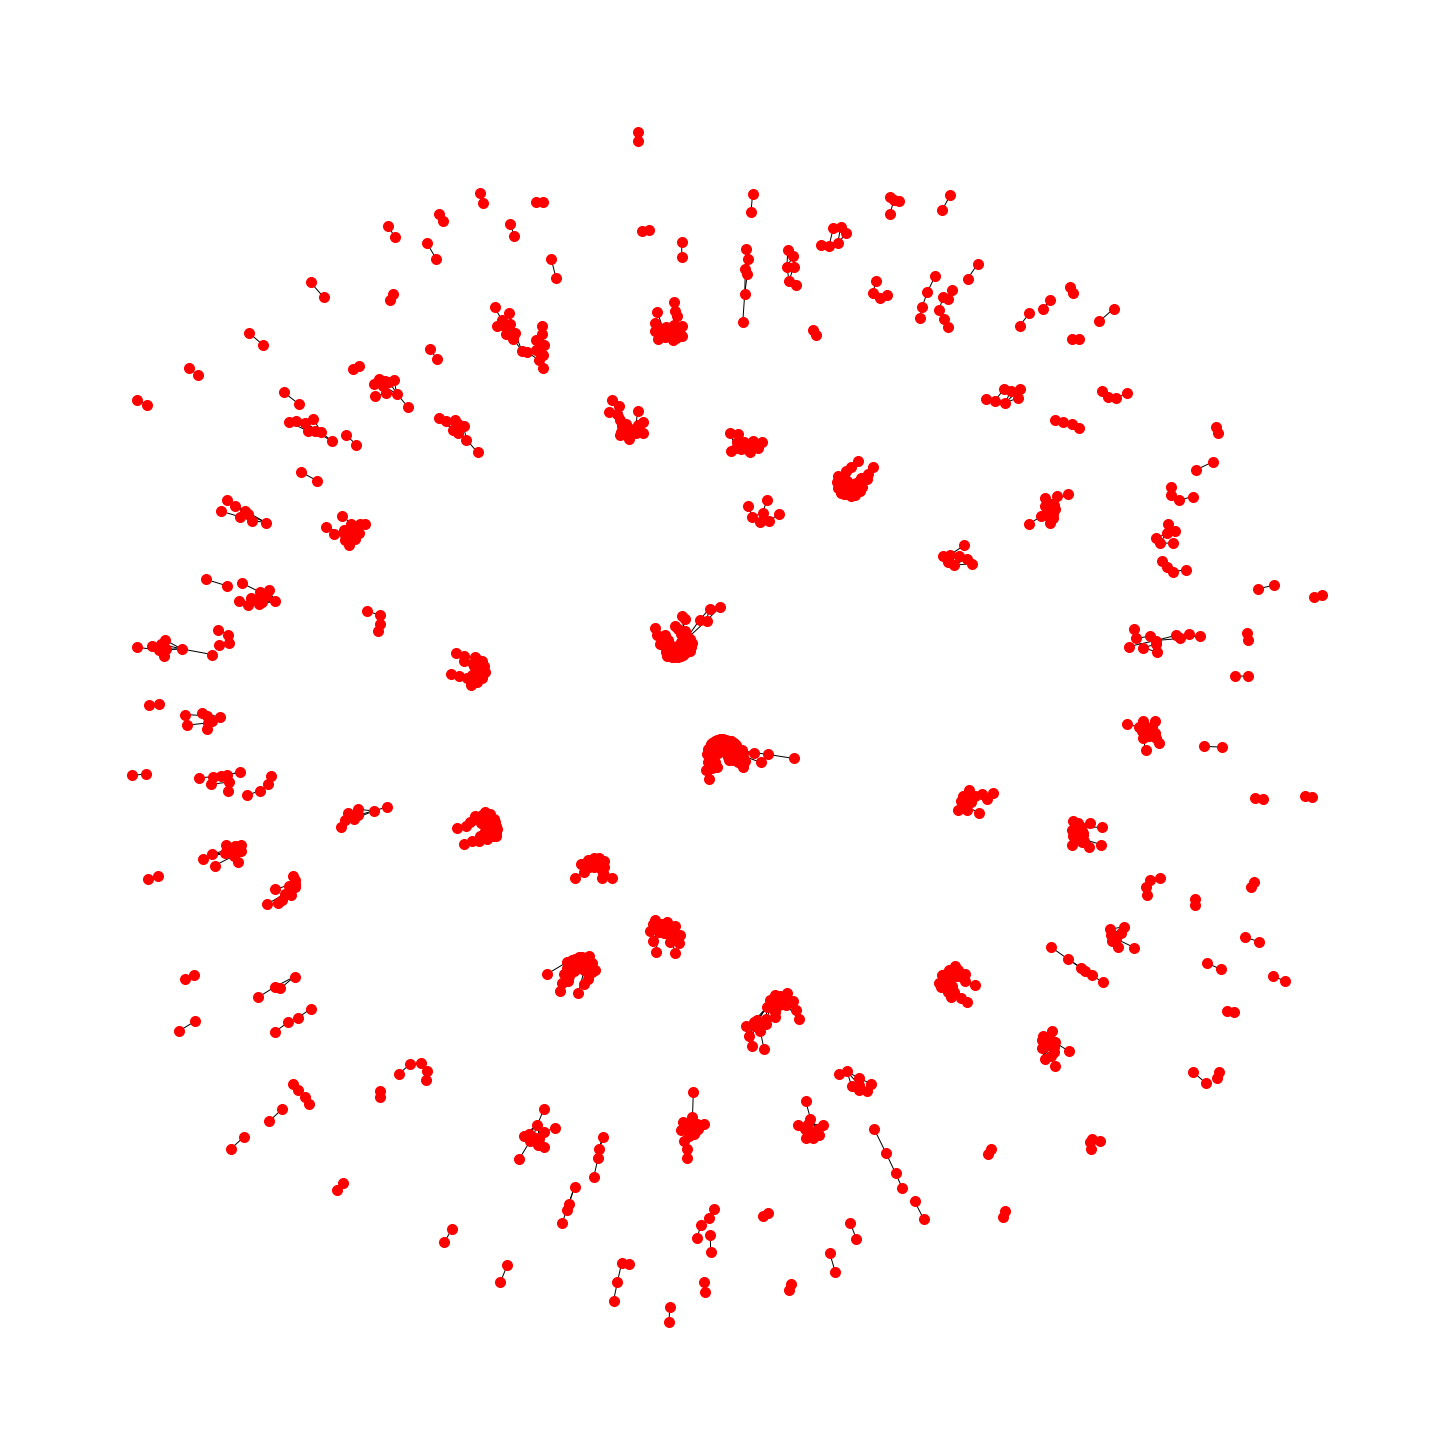

In [7]:
plt_1=plt.figure(figsize = (20,20))
nx.draw(G, node_size=100, node_color='red')

#Graph Stats

In [8]:
#number of isolates
print("number of isolates", len(list(nx.isolates(G))))
#check for self-loops
print("number of self-loops =",nx.number_of_selfloops(G))

number of isolates 0
number of self-loops = 0


In [9]:
#graph statistics
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 999
Nodes: ['http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904 ', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000903', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991104', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991107', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19980312', 'http://counterterror.mindswap.org/2005/ict_events.owl#Red_Army_Faction_19890812', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19950203', 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980630', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19981117', 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_20000608', 'http://counterterror.mindswap.org/2005/ict_events.ow

In [10]:
#node statistics
degree_cent = nx.degree_centrality(G)
eigen_cent = nx.eigenvector_centrality(G)
print("degress centrality =",degree_cent)
print("eigen centrality =",eigen_cent)

degress centrality = {'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904 ': 0.0250501002004008, 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000903': 0.0030060120240480957, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991104': 0.014028056112224447, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991107': 0.01603206412825651, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19980312': 0.02104208416833667, 'http://counterterror.mindswap.org/2005/ict_events.owl#Red_Army_Faction_19890812': 0.012024048096192383, 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19950203': 0.002004008016032064, 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980630': 0.01503006012024048, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19981117': 0.0080

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


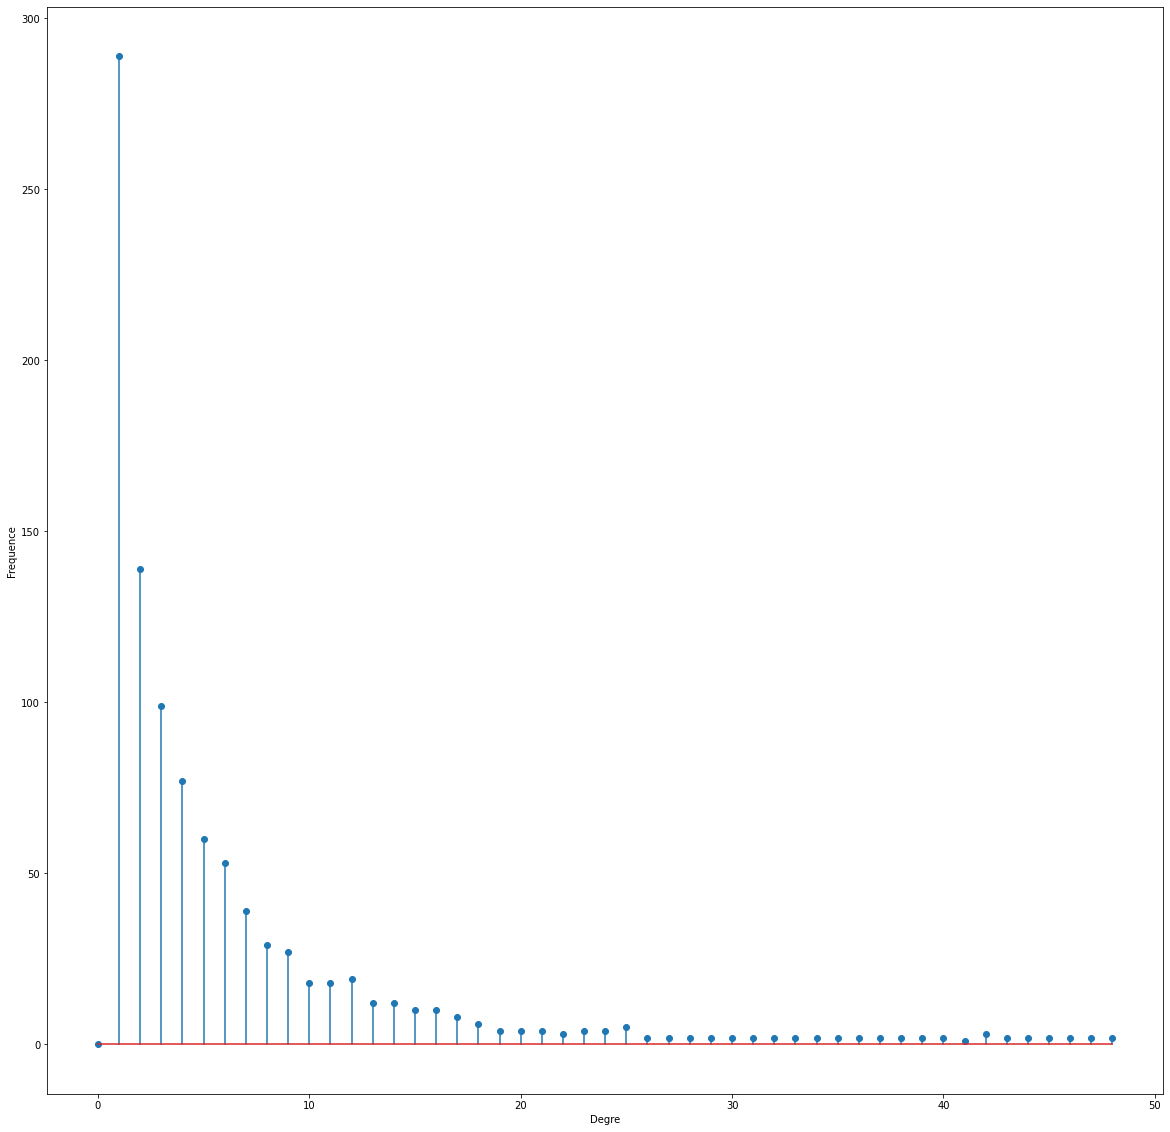

In [11]:
#Use matplotlib stem plot to analyze degree frequency
degree_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.figure(figsize=(20, 20))
# https://pythontic.com/visualization/charts/stem%20plot
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degre")
plt.show()

In [12]:
from operator import itemgetter

In [13]:
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
for i in (sorted(pgr.items(), key=itemgetter(1), reverse=True)):
  print(i)


 sorted pagerank:

('http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Armed_Forces_of_Colombia_19980323', 0.002329434059939629)
('http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000903 ', 0.0023000880413883576)
('http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980313 ', 0.0021446193595251956)
('http://counterterror.mindswap.org/2005/ict_events.owl#Hamas_19941009', 0.002143977673466197)
('http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904 ', 0.002091552775011948)
('http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19940704', 0.002083147717481008)
('http://counterterror.mindswap.org/2005/ict_events.owl#Fatah_Tanzim_20001101', 0.0020103035961457445)
('http://counterterror.mindswap.org/2005/ict_events.owl#Hamas_19980924 ', 0.001984710799805504)
('http://counterterror.mindswap.org/2005/ict_events.owl#Martyrs_of_al-Aqsa_20020225', 0.0019840790034295636)
('http://counterterror.mi

In [14]:
print("Global Clustering Coeffecient =", nx.average_clustering(G))
print("Local Clustering Coeffecient =", nx.clustering(G))

Global Clustering Coeffecient = 0.0
Local Clustering Coeffecient = {'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000904 ': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_20000903': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991104': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19991107': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19980312': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Red_Army_Faction_19890812': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19950203': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Unknown_19980630': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_19981117': 0, 'http://counterterror.mindswap.org/2005/ict_events.owl#Revolutionary_Organization_17_November_20000608': 

# Community Detection

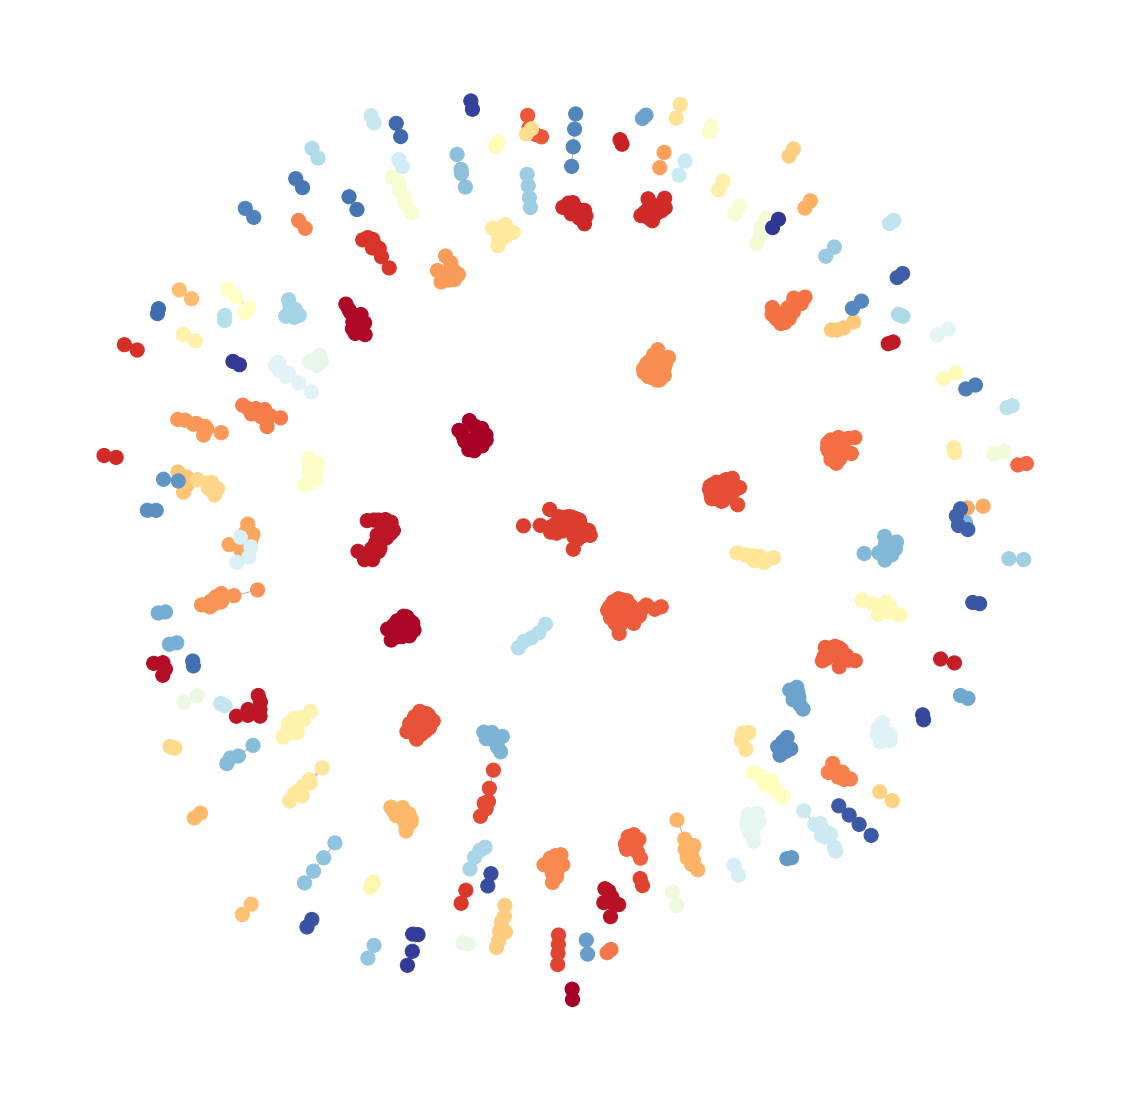

In [15]:
import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size = 200, cmap = plt.cm.RdYlBu, node_color=list(partition.values()))
#nx.draw_networkx_labels(G, pos, font_size = 8)
nx.draw_networkx_edges(G, pos, alpha = 0.3)
plt.show(G)


Text(0.5, 1.0, 'Betweenness Centrality')

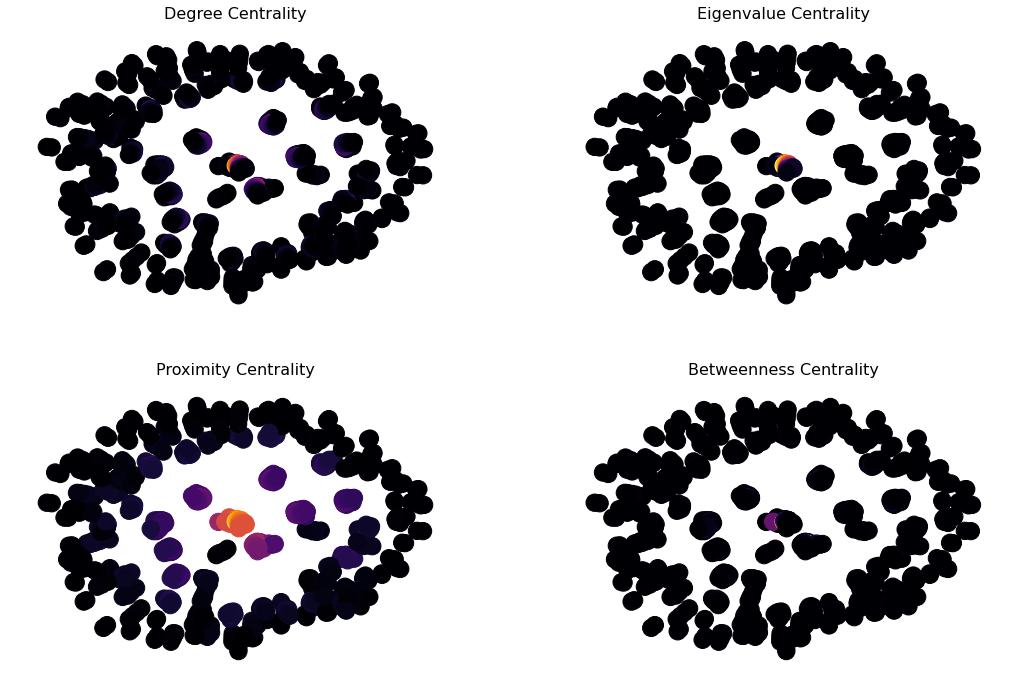

In [16]:
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())

c_eigenvector = nx.eigenvector_centrality(G)
c_eigenvector = list(c_eigenvector.values())

c_closeness = nx.closeness_centrality(G)
c_closeness = list(c_closeness.values())

c_betweenness = nx.betweenness_centrality(G)
c_betweenness = list(c_betweenness.values())

plt.figure(figsize=(18, 12))
# Degree Centrality
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_degree, node_size=300, pos=pos)
axarr[0,0].set_title('Degree Centrality', size=16)
# Eigenvalue Centrality
plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=300, pos=pos)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)
# Closeness Centrality
plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=300, pos=pos)
axarr[1,0].set_title('Proximity Centrality', size=16)
# Betweenness Centrality
plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=300, pos=pos)
axarr[1,1].set_title('Betweenness Centrality', size=16)

# Binary Node Classification

In [17]:
#mapping node urls to int ids
mapping={}
for i in range(len(nodes['node'])):
  mapping[nodes['node'][i]]=i
for i in range(len(src)):
  src[i]=mapping[src[i].strip()]
for i in range(len(dst)):
  dst[i]=mapping[dst[i].strip()]

In [18]:
#mapping labels to int ids
mappingl={}
for i in range(len(labelsm['label'])):
  mappingl[labelsm['label'][i]]=i
for i in range(len(labels['label'])):
  labels['label'][i]=mappingl[labels['label'][i].strip()]

In [19]:
!pip install dgl
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

     |████████████████████████████████| 4.4 MB 29.0 MB/s 
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


In [20]:
u = np.concatenate([src, dst])
v = np.concatenate([dst, src])
g = dgl.graph((u,v), num_nodes=len(nodes))#undirected graph
g

Graph(num_nodes=1293, num_edges=6344,
      ndata_schemes={}
      edata_schemes={})

In [21]:
#feature adjacency matrix
from numpy import genfromtxt
feat = genfromtxt('feat.csv', delimiter=',')
g.ndata['feat']=torch.from_numpy(feat)
g.ndata['feat']=g.ndata['feat'].type(torch.FloatTensor)

In [22]:
#labels
g.ndata['label'] = torch.from_numpy(labels['label'].astype('category').cat.codes.to_numpy()).type(torch.LongTensor)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  


In [23]:
#train, validation, test split = 90%, 5%, 5%
n_nodes = len(nodes)
n_train = int(n_nodes* 0.9)
n_val = int(n_nodes* 0.05)
train_mask = torch.zeros(n_nodes, dtype=torch.bool)
val_mask = torch.zeros(n_nodes, dtype=torch.bool)
test_mask = torch.zeros(n_nodes, dtype=torch.bool)
train_mask[:n_train] = True
val_mask[n_train:n_train + n_val] = True
test_mask[n_train + n_val:] = True
g.ndata['train_mask'] = train_mask
g.ndata['val_mask'] = val_mask
g.ndata['test_mask'] = test_mask

In [24]:
print('Node features')
print(g.ndata)
print('Edge features')
print(g.edata)

Node features
{'feat': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]]), 'label': tensor([0, 0, 0,  ..., 5, 5, 5]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True])}
Edge features
{}


In [25]:
g

Graph(num_nodes=1293, num_edges=6344,
      ndata_schemes={'feat': Scheme(shape=(106,), dtype=torch.float32), 'label': Scheme(shape=(), dtype=torch.int64), 'train_mask': Scheme(shape=(), dtype=torch.bool), 'val_mask': Scheme(shape=(), dtype=torch.bool), 'test_mask': Scheme(shape=(), dtype=torch.bool)}
      edata_schemes={})

In [26]:
from dgl.nn import GraphConv

class GCN(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats,allow_zero_in_degree=True)
        self.conv2 = GraphConv(h_feats, num_classes,allow_zero_in_degree=True)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

#creating model
model = GCN(g.ndata['feat'].shape[1], 16, 6)

In [27]:
def train(g, model):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    best_val_acc = 0
    best_test_acc = 0

    features = (g.ndata['feat'])
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    for e in range(20):
        #forward
        logits = model(g, features)

        #computing prediction
        pred = logits.argmax(1)

        #computing losses of the nodes in the training set
        loss = F.cross_entropy(logits[train_mask], labels[train_mask])

        #computing accuracy on training/validation/test
        train_acc = (pred[train_mask] == labels[train_mask]).float().mean()
        val_acc = (pred[val_mask] == labels[val_mask]).float().mean()
        test_acc = (pred[test_mask] == labels[test_mask]).float().mean()

        #saving the best validation accuracy and the corresponding test accuracy.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_test_acc = test_acc

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print('In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f}), test acc: {:.3f} (best {:.3f})'.format(
                e, loss, val_acc, best_val_acc, test_acc, best_test_acc))

In [28]:
model = GCN(g.ndata['feat'].shape[1], 16, 6)
model

GCN(
  (conv1): GraphConv(in=106, out=16, normalization=both, activation=None)
  (conv2): GraphConv(in=16, out=6, normalization=both, activation=None)
)

In [29]:
train(g, model)

In epoch 0, loss: 1.779, val acc: 0.031 (best 0.031), test acc: 0.061 (best 0.061)
In epoch 1, loss: 1.727, val acc: 0.031 (best 0.031), test acc: 0.121 (best 0.061)
In epoch 2, loss: 1.670, val acc: 0.062 (best 0.062), test acc: 0.152 (best 0.152)
In epoch 3, loss: 1.614, val acc: 0.125 (best 0.125), test acc: 0.167 (best 0.167)
In epoch 4, loss: 1.558, val acc: 0.125 (best 0.125), test acc: 0.182 (best 0.167)
In epoch 5, loss: 1.503, val acc: 0.156 (best 0.156), test acc: 0.212 (best 0.212)
In epoch 6, loss: 1.452, val acc: 0.188 (best 0.188), test acc: 0.212 (best 0.212)
In epoch 7, loss: 1.409, val acc: 0.203 (best 0.203), test acc: 0.227 (best 0.227)
In epoch 8, loss: 1.372, val acc: 0.203 (best 0.203), test acc: 0.227 (best 0.227)
In epoch 9, loss: 1.343, val acc: 0.203 (best 0.203), test acc: 0.273 (best 0.227)
In epoch 10, loss: 1.319, val acc: 0.203 (best 0.203), test acc: 0.273 (best 0.227)
In epoch 11, loss: 1.299, val acc: 0.219 (best 0.219), test acc: 0.273 (best 0.273)
In

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
